This tutorial covers a typical ML workflow; from data preparation to model evaluation.

**Aim**: Predict missing lithology values of a log from other well logs

**Objectives**

* Import full data and select data for use
* Visualize data and perform EDA to gain insights for data modelling
* Train machine learning model
* Predict selected log
* Evaluate machine learning prediction

The gamma ray log was chosen for this tutorial workflow as the target log

In [1]:
# import required modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sklm
import petroeval as pet

In [2]:
wells = pd.read_csv('./data/Well logs/train.csv', sep=';')

In [3]:
wells = pet.set_mnemonics(wells, 'GR', 'NPHI', 'RHOB', RT='RDEP')

### Data Selection

Two different wells were selected; well1 as training well and well 2 as test well

In [5]:
well1 = wells.loc[wells.WELL == '15/9-13']
well2 = wells.loc[wells.WELL == '15/9-15']

### Data Visualization

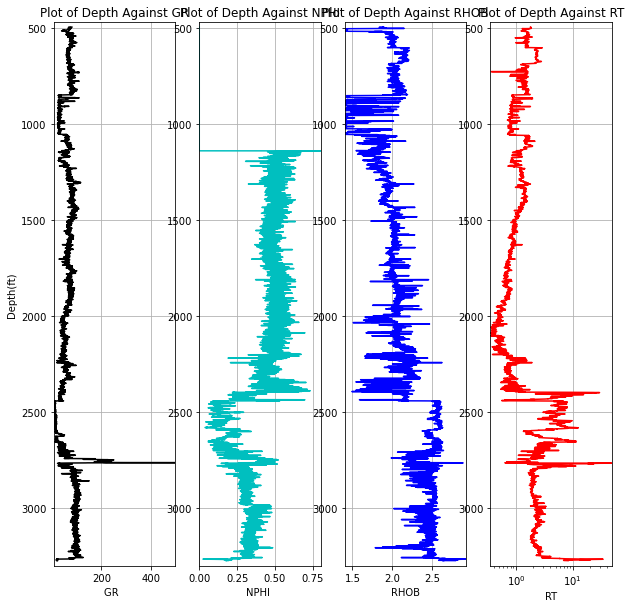

In [6]:
pet.four_plots(logs=well1, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=470, base=3300, depth='DEPTH_MD')

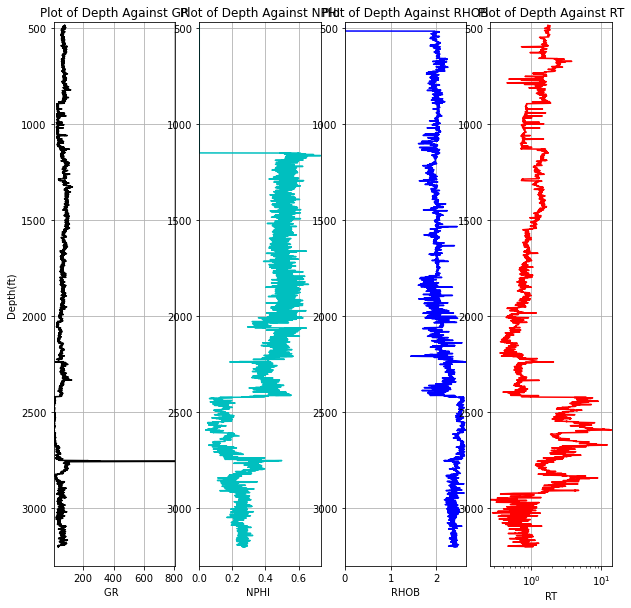

In [7]:
pet.four_plots(logs=well2, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=470, base=3300, depth='DEPTH_MD')

In [8]:
# truncating the spurious GR readings to visualize the log better

well1.loc[well1.GR > 200, 'GR'] = 200
well2.loc[well2.GR > 200, 'GR'] = 200

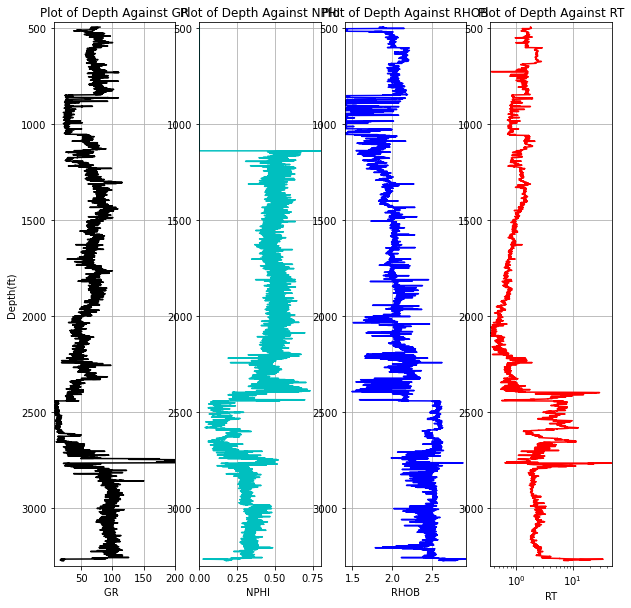

In [9]:
pet.four_plots(logs=well1, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=470, base=3300, depth='DEPTH_MD')

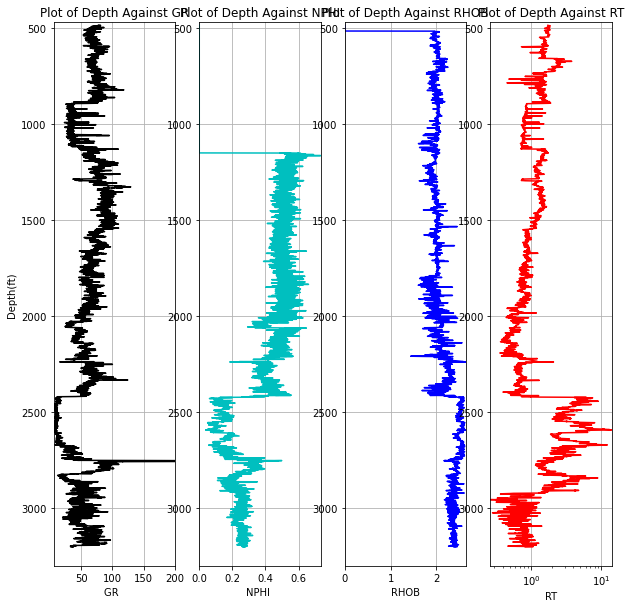

In [10]:
pet.four_plots(logs=well2, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=470, base=3300, depth='DEPTH_MD')

### Data Preparation

In [11]:
# making the train data set

train_data = well1

In [12]:
test_data = well2

In [13]:
# Encoding the categorical variables/logs in the data set

print(f'Shape of dataset before encoding: {train_data.shape}')
train_data['GROUP_encoded'] = train_data['GROUP'].astype('category')
train_data['GROUP_encoded'] = train_data['GROUP_encoded'].cat.codes 

train_data['FORMATION_encoded'] = train_data['FORMATION'].astype('category')
train_data['FORMATION_encoded'] = train_data['FORMATION_encoded'].cat.codes 

print(f'Shape of dataset after encoding: {train_data.shape}')

Shape of dataset before encoding: (18270, 29)
Shape of dataset after encoding: (18270, 31)


In [14]:
# Encoding the categorical variables/logs in the data set

print(f'Shape of dataset before encoding: {test_data.shape}')
test_data['GROUP_encoded'] = test_data['GROUP'].astype('category')
test_data['GROUP_encoded'] = test_data['GROUP_encoded'].cat.codes 

test_data['FORMATION_encoded'] = test_data['FORMATION'].astype('category')
test_data['FORMATION_encoded'] = test_data['FORMATION_encoded'].cat.codes 

print(f'Shape of dataset after encoding: {test_data.shape}')

Shape of dataset before encoding: (17717, 29)
Shape of dataset after encoding: (17717, 31)


In [15]:
# dropping the categorical variables after encoding to prevent errors while trying to train the model

train_data = train_data.drop(['WELL', 'GROUP', 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                   'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)
test_data = test_data.drop(['WELL', 'GROUP', 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                   'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)

In [16]:
train_data = train_data.drop(['X_LOC', 'Y_LOC', 'Z_LOC'], axis=1)
test_data = test_data.drop(['X_LOC', 'Y_LOC', 'Z_LOC'], axis=1)

In [17]:
(train_data.isna().sum()/train_data.shape[0]) * 100

DEPTH_MD               0.000000
CALI                   0.000000
RSHA                  91.116585
RMED                   0.000000
RT                     0.000000
RHOB                   0.000000
GR                     0.000000
SGR                  100.000000
NPHI                  23.196497
PEF                   10.016420
DTC                    0.443350
SP                     0.000000
BS                   100.000000
ROP                    0.596606
DTS                  100.000000
DCAL                 100.000000
DRHO                   0.000000
MUDWEIGHT              4.411604
RMIC                 100.000000
ROPA                 100.000000
RXO                   91.094691
GROUP_encoded          0.000000
FORMATION_encoded      0.000000
dtype: float64

In [18]:
(test_data.isna().sum()/well2.shape[0]) * 100

DEPTH_MD               0.000000
CALI                   0.462832
RSHA                   0.000000
RMED                   0.000000
RT                     0.000000
RHOB                   1.106282
GR                     0.000000
SGR                  100.000000
NPHI                  24.671220
PEF                    0.310436
DTC                    0.050799
SP                     0.000000
BS                     0.011289
ROP                    0.152396
DTS                  100.000000
DCAL                   0.451544
DRHO                   0.496698
MUDWEIGHT              0.005644
RMIC                 100.000000
ROPA                 100.000000
RXO                    0.000000
GROUP_encoded          0.000000
FORMATION_encoded      0.000000
dtype: float64

In [19]:
# dropping empty wells

train_data = train_data.drop(['SGR', 'BS', 'DTS', 'DCAL', 'RMIC', 'ROPA'], axis=1)
test_data = test_data.drop(['SGR', 'BS', 'DTS', 'DCAL', 'RMIC', 'ROPA'], axis=1)

In [20]:
# getting train, test features and targets

y_train = train_data['SP']
train_data = train_data.drop(['SP'], axis=1)

labels = test_data['SP']
test_data = test_data.drop(['SP'], axis=1)

In [21]:
testdata = test_data.copy()

In [22]:
# filling up other missing values that may be present with -9999

train_data.fillna(-9999, inplace=True, axis=1)
test_data.fillna(-9999, inplace=True, axis=1)

In [23]:
rf = sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=18, verbose=2)
rf.fit(train_data, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished


ExtraTreesRegressor(max_depth=18, verbose=2)

### Prediction

In [24]:
pred = rf.predict(test_data)
pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


array([ 58.58882845,  58.45175123,  58.43445809, ..., 113.07097961,
       113.0762928 , 105.55882071])

### Evaluation

In [25]:
# outputing some of the actual labels and predicted values 

np.array(labels[3000:3010]), pred[3000:3010]

(array([57.15784454, 57.42738342, 56.50114059, 54.33019257, 53.59873962,
        54.14754105, 55.00621414, 54.9037323 , 54.52894974, 54.33102798]),
 array([37.31379595, 36.10498505, 34.95684637, 34.25885209, 35.08472289,
        34.83341632, 34.72909921, 34.51154255, 34.49426055, 34.43016544]))

In [26]:
sklm.r2_score(labels, pred)

0.6979385676846621

In [27]:
(sklm.mean_squared_error(pred, labels)) ** 0.5

12.059678852115034

In [28]:
testdata['pred'] = pred
testdata['GR'] = labels

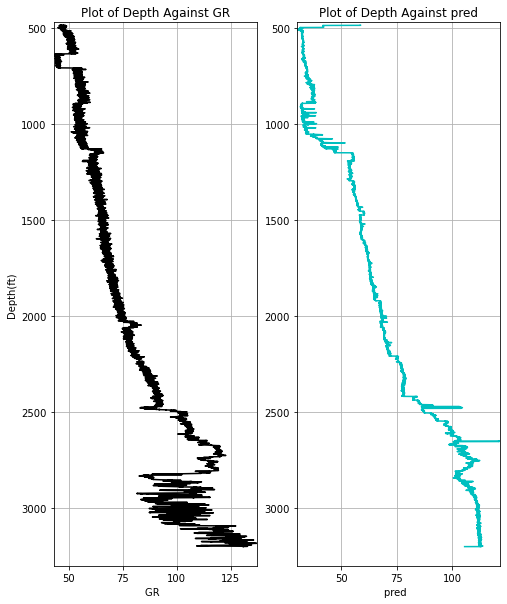

In [29]:
pet.two_plots(logs=testdata, x1='GR', x2='pred',  top=470, base=3300, depth='DEPTH_MD')

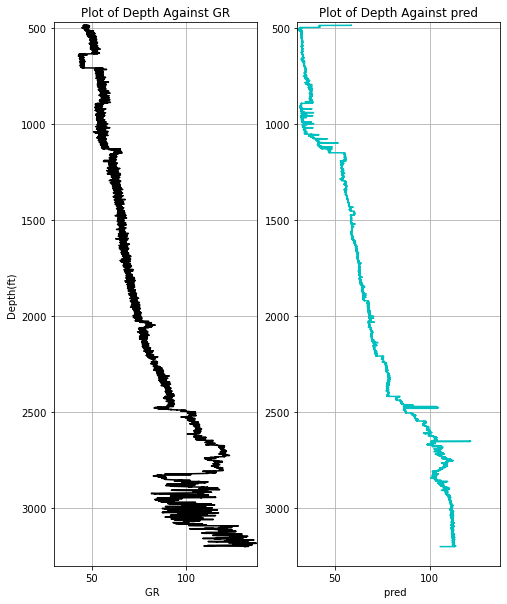

In [30]:
pet.two_plot(logs=testdata, x1='GR', x2='pred',  top=470, base=3300, depth='DEPTH_MD', scale=True)